### Distancia en birth pos vs snap form

In [ ]:
%%time

import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.interpolate import CubicSpline


shID = np.loadtxt('../_data/my_halos.dat')[:,0]
path = '/store/erebos/omarioni/_simulations/snap_127/'
path2 = '/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/AHF_output_2x2.5Mpc/'

for i in range(11):

    data = np.loadtxt(path2 + 'HESTIA_100Mpc_8192_17_11.127_halo_'+ str('%d'%shID[i])+'.dat')

    z  = data[:,0]
    Xc = data[:,6]
    Yc = data[:,7]
    Zc = data[:,8]

    Hpos = np.array([Xc,Yc,Zc]).T  
    a = 1./(z+1)
    center_intep = CubicSpline(a[::-1],Hpos[::-1])

    pos_part = np.loadtxt('../_data/pos_part_age/sft_snap_sh_'+ str('%d'%shID[i]) +'.dat')


    ID_str = pos_part[:,0]
    x_str  = pos_part[:,1]    
    y_str  = pos_part[:,2]
    z_str  = pos_part[:,3]
    m_str  = pos_part[:,4]

    r_str = np.sqrt(x_str**2 + y_str**2 + z_str**2)

    print('subhalo_'+str('%d'%shID[i]))
    #--------------t=0------------------------  
    snap = h5py.File(path + 'subhalo_'+str('%d'%shID[i])+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    Rvir = snap['/R200'][()]

    pstr = snap['/Str/Coordinates']
    p_sf = snap['/Str/Birth_Position'][()]
    IDs  = snap['/Str/IDs'][()]

    sft  = snap['/Str/FormationTime'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.

    xstr = pstr[amask,0] * aexp/h
    ystr = pstr[amask,1] * aexp/h
    zstr = pstr[amask,2] * aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    rgal = 0.15*Rvir*aexp/h

    limit, = np.where(rstr<rgal)

    p_sf = p_sf[amask]*1000 - center_intep(sft[amask])
    x_sf = p_sf[:,0]*sft[amask]/h
    y_sf = p_sf[:,1]*sft[amask]/h
    z_sf = p_sf[:,2]*sft[amask]/h
    r_sf = np.sqrt(x_sf**2+y_sf**2+z_sf**2)

    ID_vector = np.concatenate([IDs[limit],ID_str])
    ident_vect = np.concatenate([np.zeros(len(IDs[limit])),np.ones(len(ID_str))])
    dist_vector = np.concatenate([r_sf[limit],r_str])

    mask_sort = np.argsort(ID_vector)

    IDsort = np.int_(ID_vector[mask_sort])
    Indsort = np.int_(ident_vect[mask_sort])
    distsort = dist_vector[mask_sort]

    print('hasta aca')

    Id = ''
    for aux in list(str('%d'%shID[i]))[-2:]:
        Id += aux

    data = open('../_data/pos_part_test/pos_part_sh'+Id+'.dat','a')

    for k in range(len(IDsort)-1):
        if IDsort[k] == IDsort[k+1]:
            data.write(str('%d'%IDsort[k])      + '\t'+
                       str('%12.8f'%distsort[k])+ '\t'+
                       str('%12.8f'%Indsort[k]) + '\n'+
                       str('%d'%IDsort[k+1])      + '\t'+
                       str('%12.8f'%distsort[k+1])+ '\t'+
                       str('%12.8f'%Indsort[k+1]) + '\n'
                      )

    data.close()
    

subhalo_127000000000002


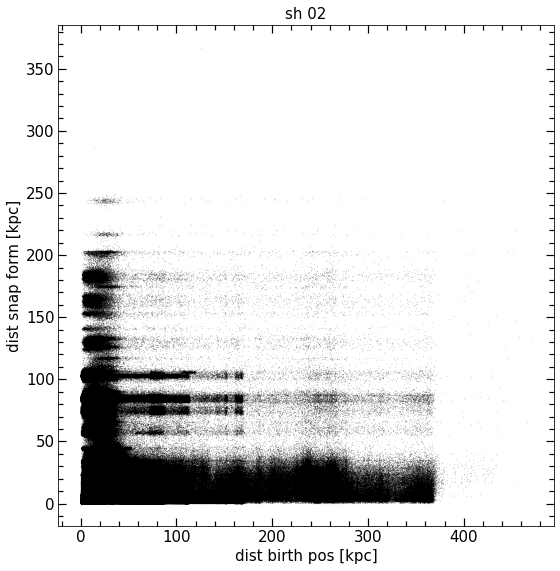

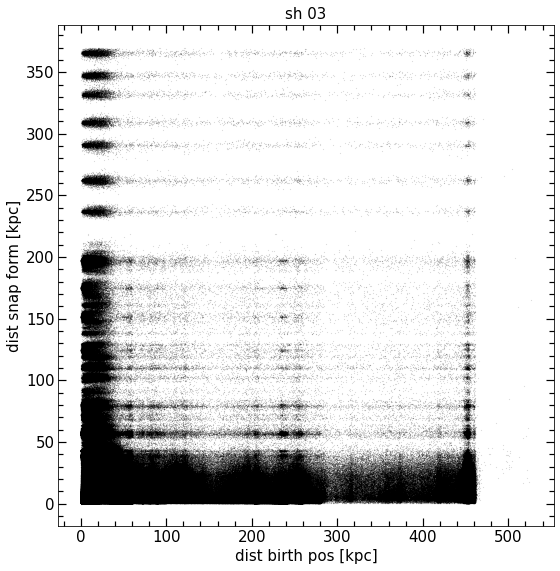

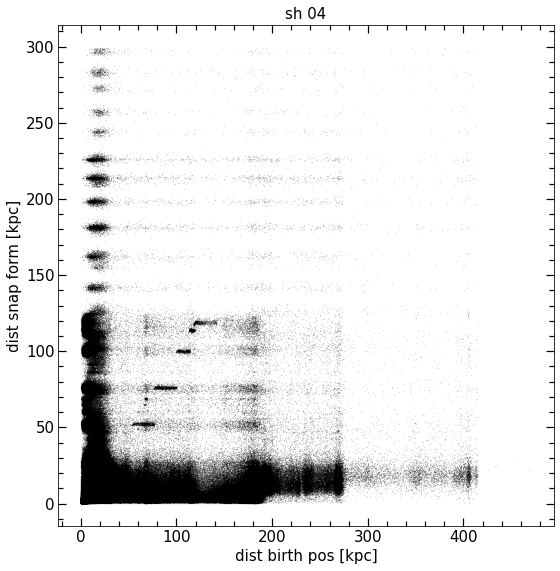

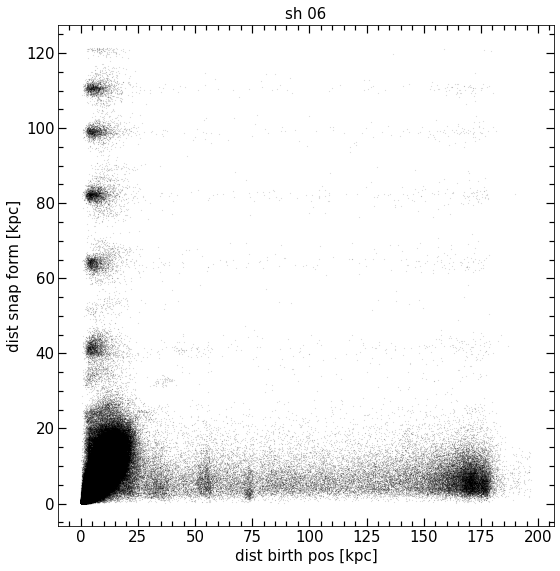

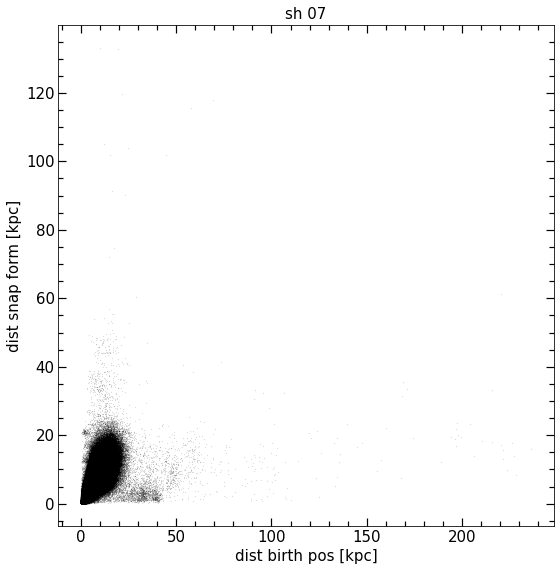

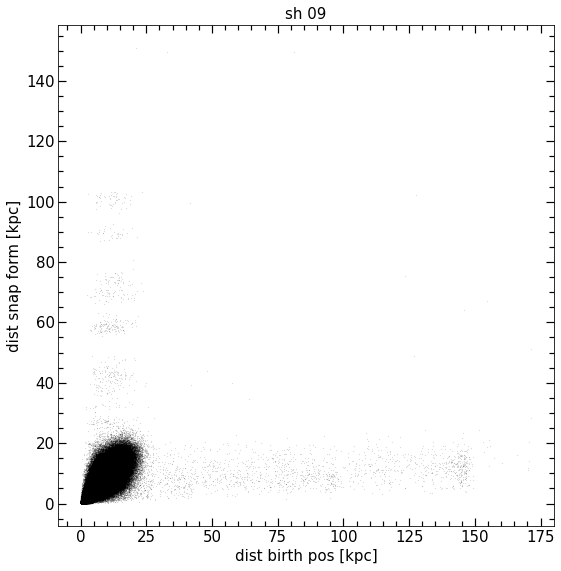

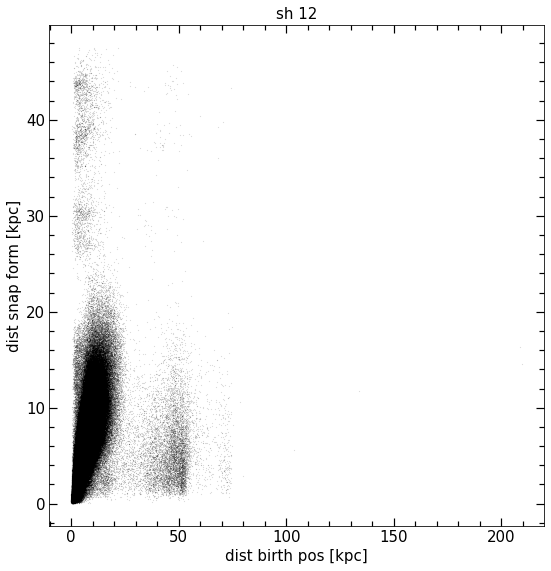

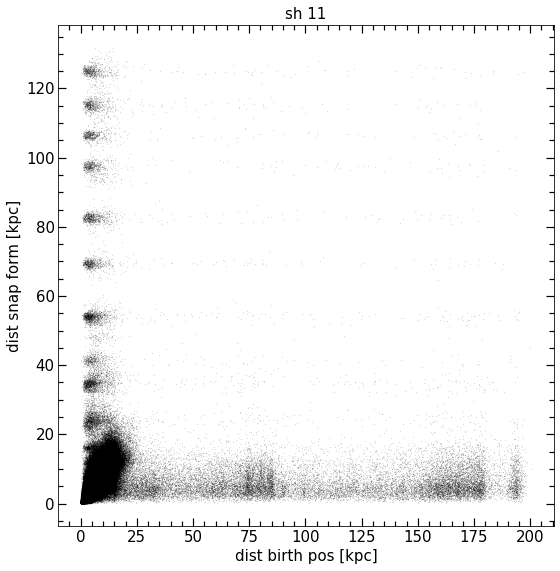

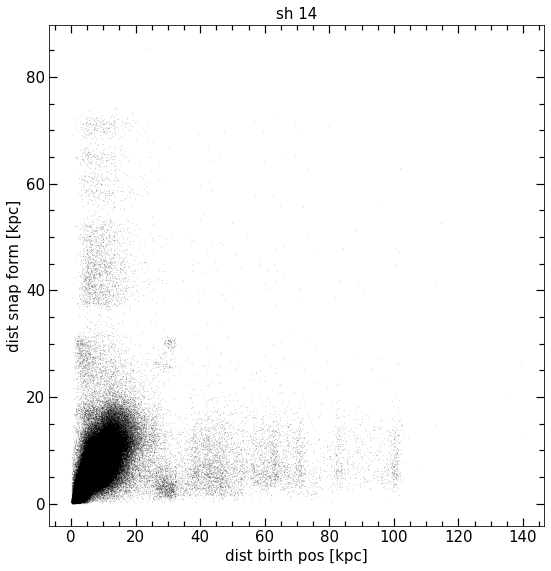

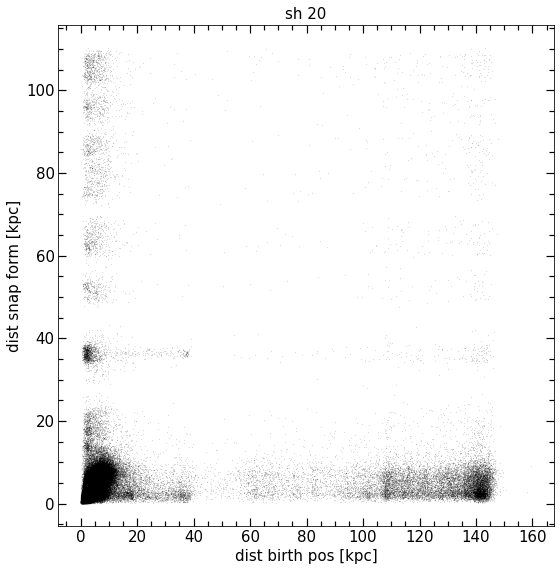

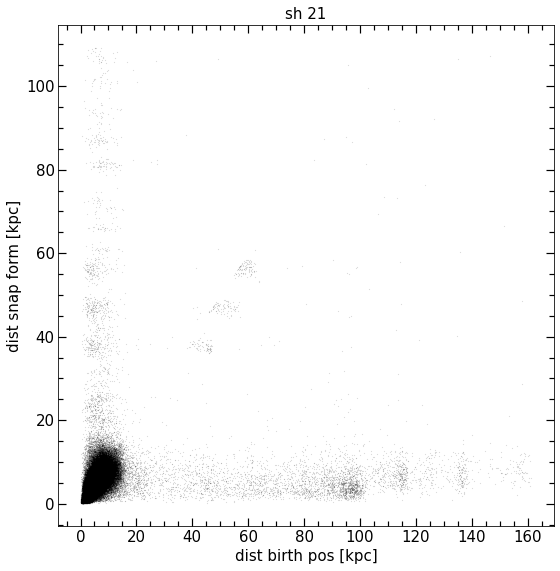

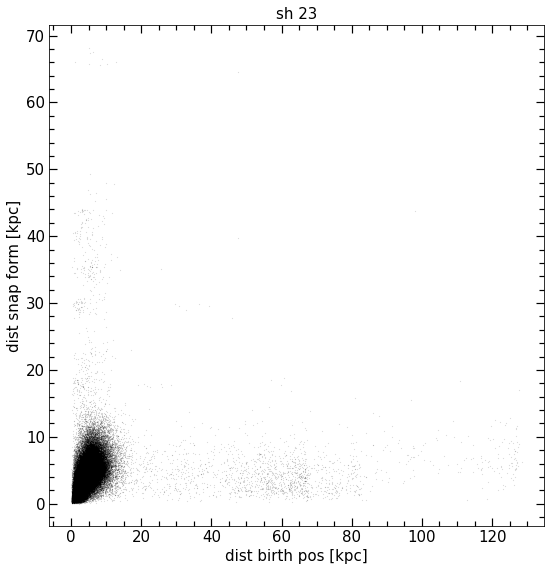

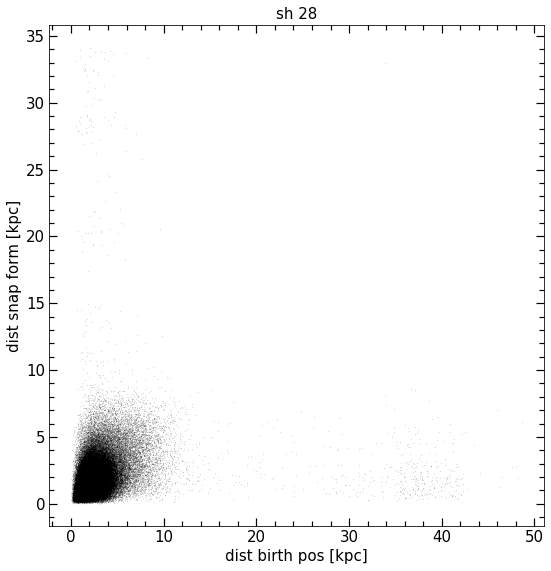

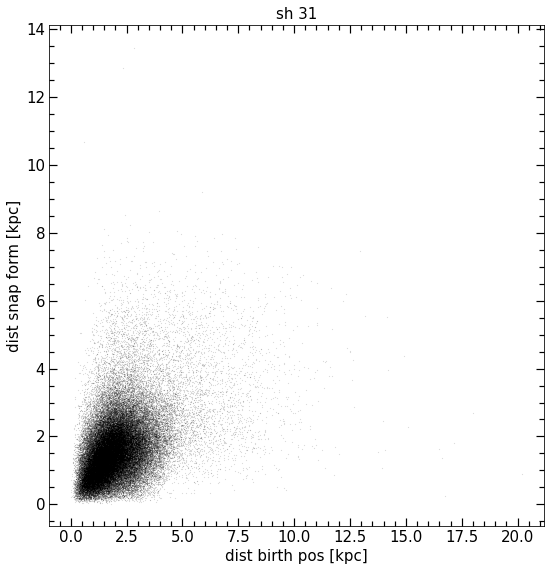

In [2]:
import matplotlib.pyplot as plt
import numpy as np

shID = np.loadtxt('../_data/my_halos.dat')[:,0]

for i in range(14):
    
    Id = ''
    for aux in list(str('%d'%shID[i]))[-2:]:
        Id += aux
        
    datos = np.loadtxt('../_data/pos_part_test/pos_part_sh'+Id+'.dat')

    ID   = datos[:,0]
    dist = datos[:,1]
    ind  = datos[:,2]

    mask0, = np.where(ind==0)
    mask1, = np.where(ind==1)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
    fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.98,top=0.97)

    ax.plot(dist[mask0],dist[mask1],'k.',ms=0.1)
    ax.minorticks_on()
    ax.tick_params( labelsize=15)
    ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
    ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
    ax.set_xlabel('dist birth pos [kpc]',fontsize=15)
    ax.set_ylabel('dist snap form [kpc]',fontsize=15)
    ax.set_title('sh '+Id, fontsize=15)

    plt.show()

In [4]:
ID[mask0]

array([3.07631342e+08, 3.07631589e+08, 3.07648151e+08, ...,
       1.67805661e+09, 1.67807705e+09, 1.67922720e+09])

In [5]:
ID[mask1]

array([3.07631342e+08, 3.07631589e+08, 3.07648151e+08, ...,
       1.67805661e+09, 1.67807705e+09, 1.67922720e+09])